## **Dataset Characteristics - Missing Dates**

In this Jupyter notebook, we checked for days without any sales at all (most likely the shop was closed ;-)

### **0 - Import the file**

In [82]:
# Import the necessary libaries
import csv
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno
import seaborn as sns

# Correct URL
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/2_merged_data_cleaned.csv'

# Read the file and check it out
df = pd.read_csv(url)
df.info()
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                9334 non-null   object 
 1   Bewoelkung           9264 non-null   float64
 2   Temperatur           9318 non-null   float64
 3   Windgeschwindigkeit  9318 non-null   float64
 4   Wettercode           7009 non-null   float64
 5   KielerWoche          223 non-null    float64
 6   Warengruppe          9334 non-null   float64
 7   Umsatz               9334 non-null   float64
dtypes: float64(7), object(1)
memory usage: 583.5+ KB
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375                 15.0        20.0   
1  2013-07-01         6.0     17.8375                 15.0        20.0   
2  2013-07-01         6.0     17.8375                 15.0        20.0   
3  2013-07-01         6.0     17.8375       

In [87]:
# Convert 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Aggregate 'Umsatz' by 'Datum'
df_aggregated = df.groupby('Datum').agg({'Umsatz': 'sum'}).reset_index()

# Create 'Warengruppe-Total' by counting the occurrences of each Warengruppe item per day
warengruppe_total = df.groupby('Datum')['Warengruppe'].apply(lambda x: (x == 1.0).sum() + (x == 2.0).sum() + (x == 3.0).sum() + (x == 4.0).sum() + (x == 5.0).sum() + (x == 6.0).sum()).reset_index(name='Warengruppe-Total')

# Merge the aggregated 'Umsatz' and 'Warengruppe-Total' into one DataFrame
df_aggregated = pd.merge(df_aggregated, warengruppe_total, on='Datum')

# Rename 'Umsatz' column to 'Umsatz-Total'
df_aggregated.rename(columns={'Umsatz': 'Umsatz-Total'}, inplace=True)

# Save the new DataFrame into a new CSV file
df_aggregated.to_csv('2-1_merged_data_cleaned-missing_dates.csv', index=False)



# Display the new DataFrame
print("Aggregated DataFrame:")
print(df_aggregated.head(25))



Aggregated DataFrame:
        Datum  Umsatz-Total  Warengruppe-Total
0  2013-07-01   1269.249107                  5
1  2013-07-02   1430.008397                  5
2  2013-07-03   1124.274894                  5
3  2013-07-04   1184.309567                  5
4  2013-07-05   1288.023060                  5
5  2013-07-06   1540.529898                  5
6  2013-07-07   1532.372927                  5
7  2013-07-08   1203.921695                  5
8  2013-07-09   1385.112329                  5
9  2013-07-10   1384.765939                  5
10 2013-07-11   1326.861631                  5
11 2013-07-12   1354.717014                  4
12 2013-07-13   1661.861382                  5
13 2013-07-14   1786.553765                  5
14 2013-07-15   1481.963406                  5
15 2013-07-16   1375.248995                  5
16 2013-07-17   1477.670324                  4
17 2013-07-18   1389.754192                  5
18 2013-07-19   1527.076360                  5
19 2013-07-20   1788.236032           

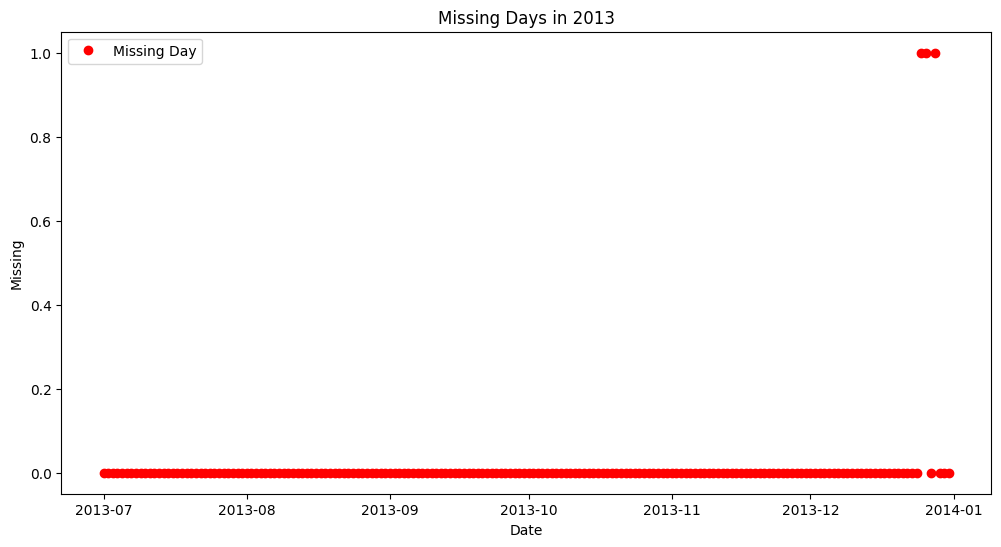

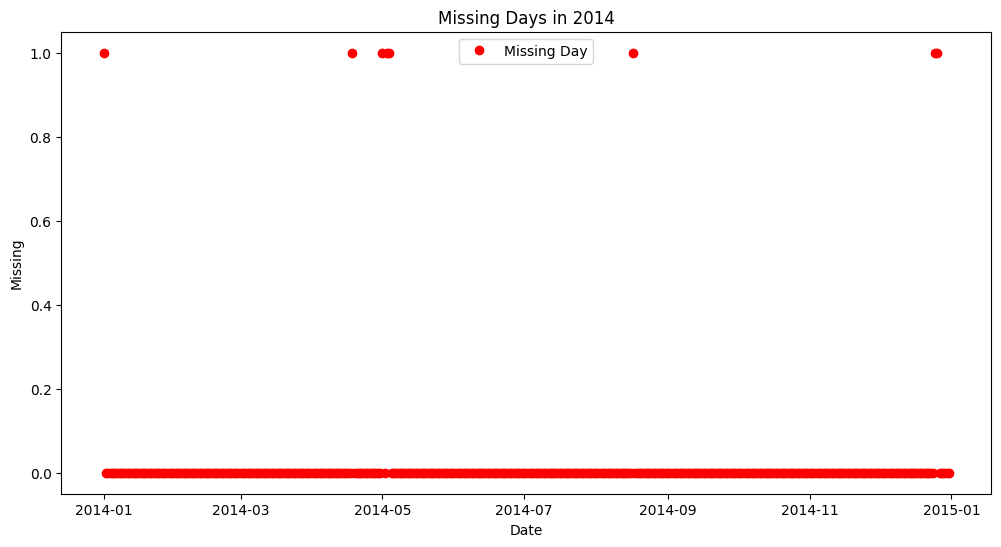

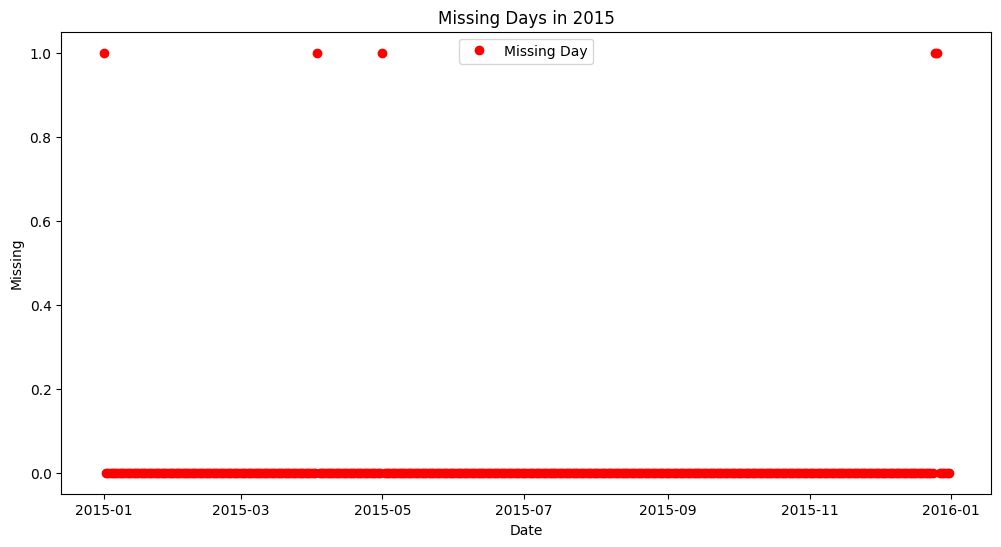

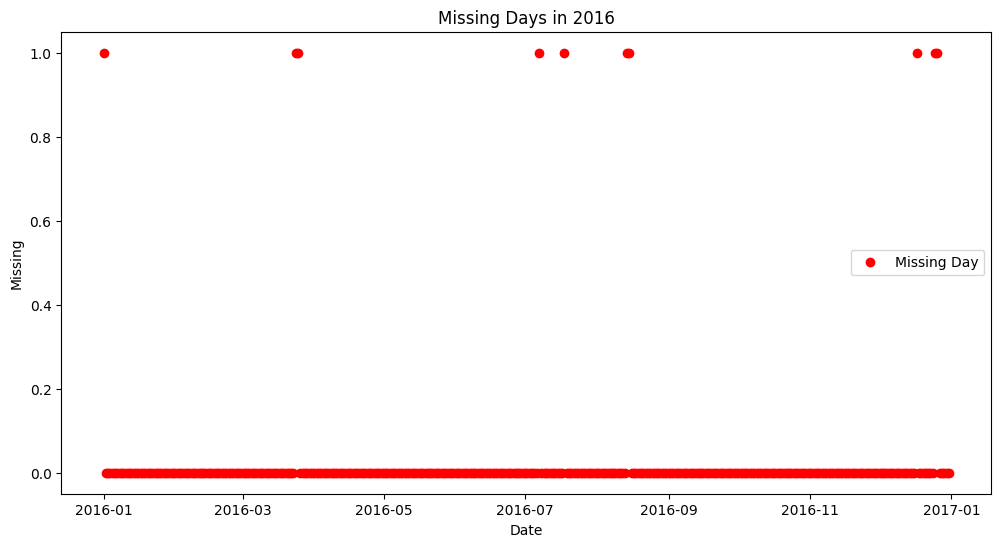

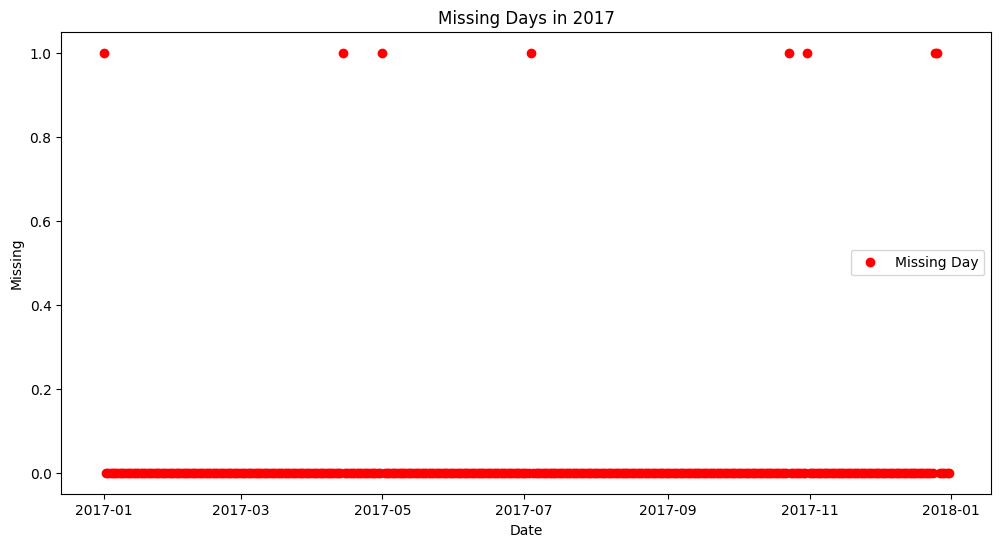

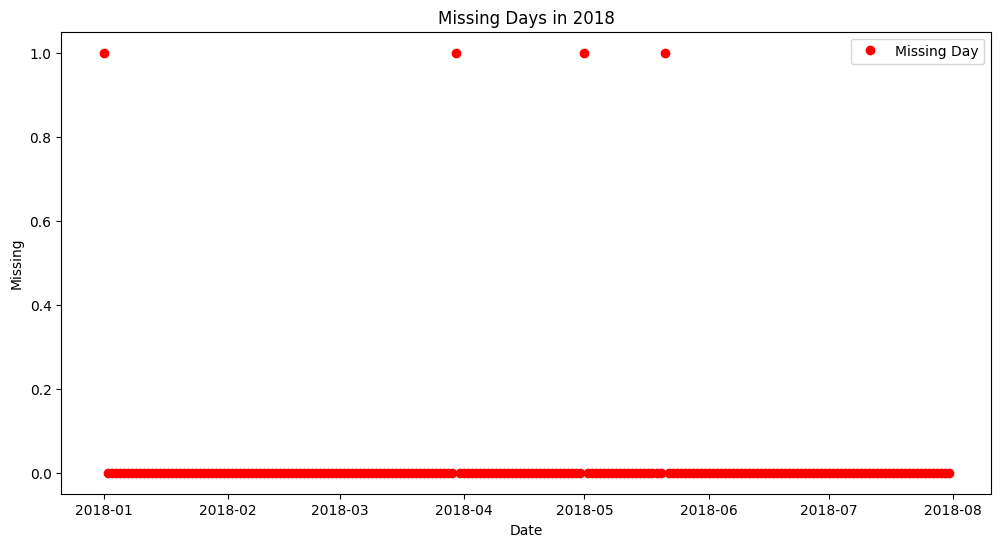

In [89]:
# Load the data
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/2-1_merged_data_cleaned-missing_dates.csv'

# Read the file and check it out
df = pd.read_csv(url)

# Convert 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Function to plot missing days for each year
def plot_missing_days(df):
    df.set_index('Datum', inplace=True)
    all_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    df = df.reindex(all_dates)
    df['missing'] = df.isnull().any(axis=1)

    for year in df.index.year.unique():
        df_year = df[df.index.year == year]
        plt.figure(figsize=(12, 6))
        plt.plot(df_year.index, df_year['missing'], marker='o', linestyle='', color='red', label='Missing Day')
        plt.title(f'Missing Days in {year}')
        plt.xlabel('Date')
        plt.ylabel('Missing')
        plt.legend()
        plt.show()

# Call the function to plot missing days
plot_missing_days(df)


It is obvious - the missing days are most likely 'Feiertage' when *all* shops in Germany have closed like Christmas or January,1st

In [94]:
# Load the data
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/2-2_missing_dates.csv'

# Read the file and check it out
df = pd.read_csv(url)
df.info()
df

print(df.head(40))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2013-12-25  37 non-null     object
dtypes: object(1)
memory usage: 424.0+ bytes
    2013-12-25
0   2013-12-26
1   2013-12-28
2   2014-01-01
3   2014-04-18
4   2014-05-01
5   2014-05-03
6   2014-05-04
7   2014-08-17
8   2014-12-25
9   2014-12-26
10  2015-01-01
11  2015-04-03
12  2015-05-01
13  2015-12-25
14  2015-12-26
15  2016-01-01
16  2016-03-24
17  2016-03-25
18  2016-07-07
19  2016-07-18
20  2016-08-14
21  2016-08-15
22  2016-12-17
23  2016-12-25
24  2016-12-26
25  2017-01-01
26  2017-04-14
27  2017-05-01
28  2017-07-04
29  2017-10-23
30  2017-10-31
31  2017-12-25
32  2017-12-26
33  2018-01-01
34  2018-03-30
35  2018-05-01
36  2018-05-21
